In [1]:
import keras_segmentation
import os
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import cv2
import numpy as np

Using TensorFlow backend.


In [4]:
# from keras.models import model_from_json

# with open('segnet_vgg_config.json','r') as f:
#     model = model_from_json(f.read())
    
# model.load_weights('segnet_vgg.4')

model = keras_segmentation.models.segnet.vgg_segnet(n_classes=3, input_height=480, input_width=640)
model.load_weights('model.h5')

(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)
(197, 215, 20)
(132, 248, 207)
(155, 244, 183)


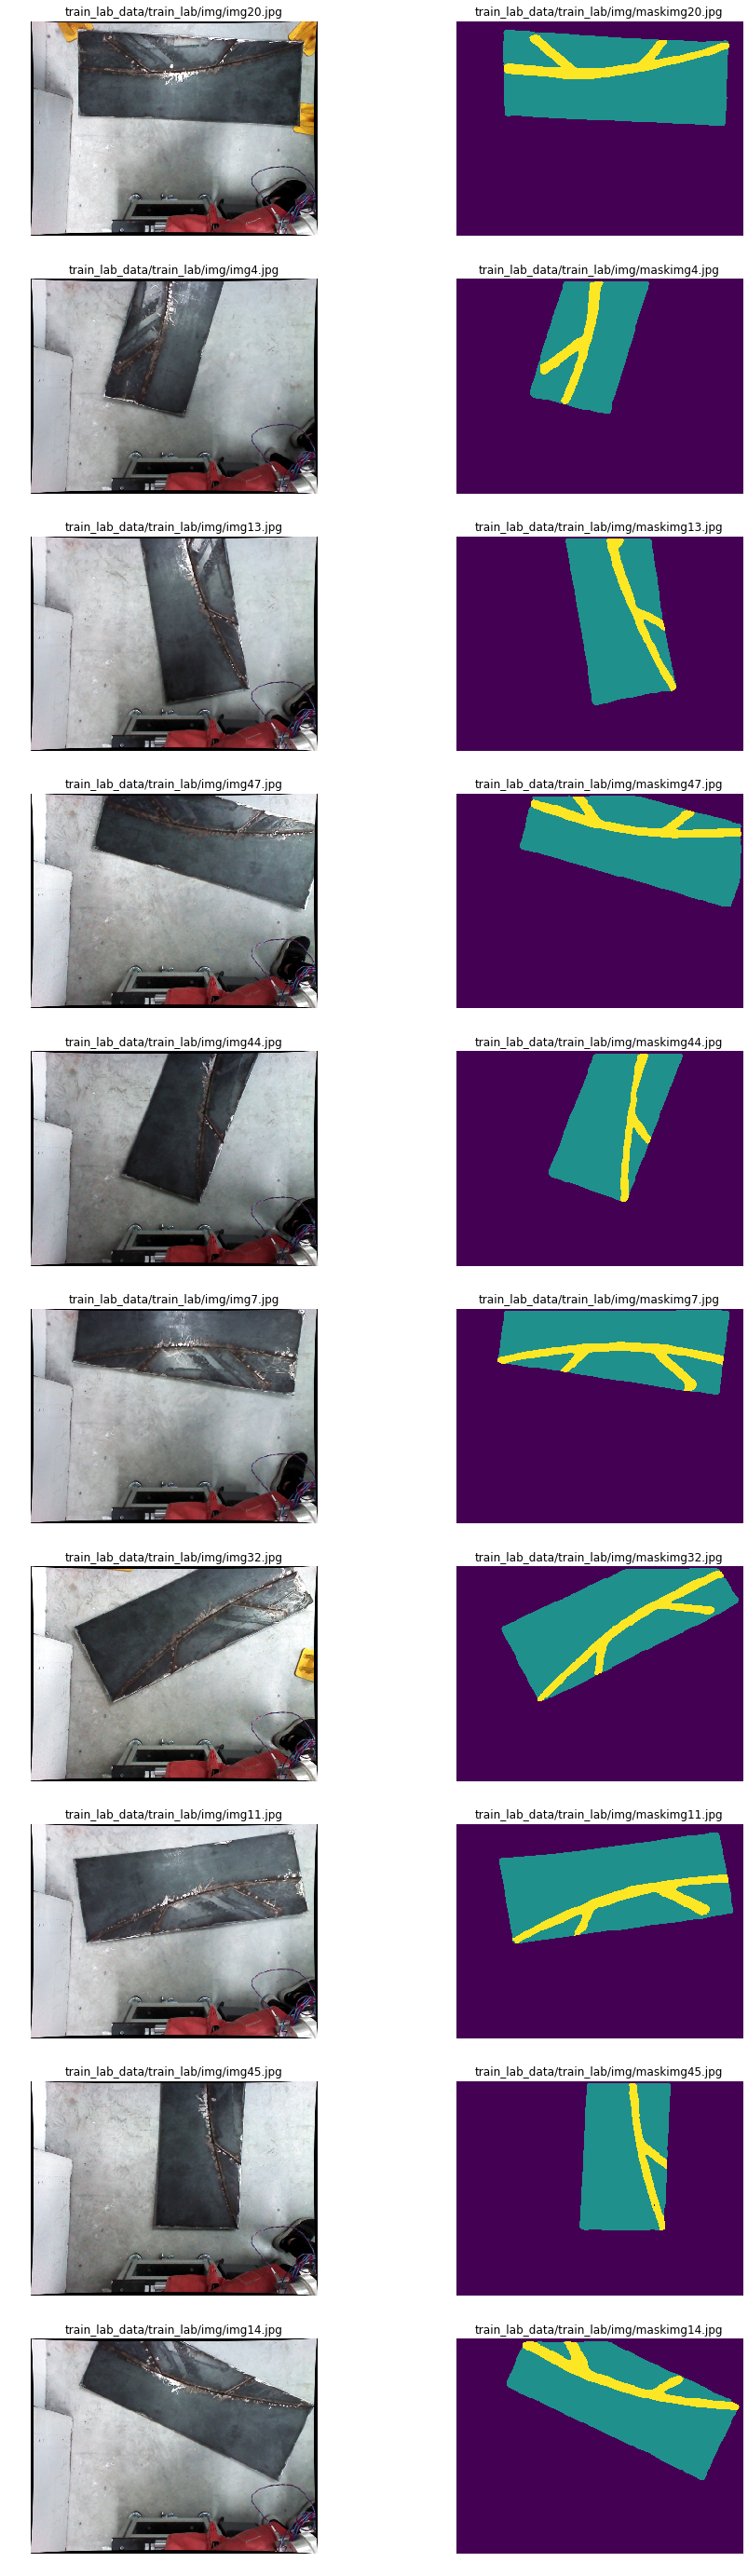

In [7]:
folder = 'train_lab_data/train_lab/img'
files = os.listdir(folder)
path = os.getcwd()
nfiles = 10 #len(files)
fig, ax = plt.subplots(nrows=nfiles, ncols=2, figsize=(15,50))
# fig.tight_layout()

# Class ID: segmentation colors BGR values
# On python3
# 0 :  (197, 215, 20) - background
# 1 :  (132, 248, 207) - intersection line
# 2 :  (155, 244, 183) - metal plate
# On python2
# 0: (216, 194, 107) - background
# 1: (66, 130, 103) - intersection line
# 2: (200, 77, 122) - metal plate

desired_imsize = (480,640,3)

for index in range(nfiles):
  file_path = os.path.join(folder,files[index])
  outfile = os.path.join(folder, "mask"+files[index])
#   print(files[index])
  img = cv2.imread(file_path)
  if img.shape != desired_imsize:
#     print(file_path+' is has size '+str(img.shape)+' resize: '+str(desired_imsize))
    img = cv2.resize(img, (desired_imsize[1], desired_imsize[0]))
    
  # inp=file_path # can also given file path instead of cv2 image
  out = model.predict_segmentation(
    inp=img,
    out_fname= outfile
  )
  
  img2 = mpimg.imread(file_path)
#   bgr_img = cv2.imread(file_path)
#   b,g,r = cv2.split(out)       # get b,g,r
#   out = cv2.merge([r,g,b])     # switch it to rgb

  ax[index,0].imshow(img2)
  ax[index,0].axis('off')
  ax[index,0].set_title(file_path)
  ax[index,1].imshow(out)
  ax[index,1].axis('off')
  ax[index,1].set_title(outfile)